<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
file_types = '/content/drive/My Drive/Colab Notebooks/data/tr_types.csv'
file_transactions = '/content/drive/My Drive/Colab Notebooks/data/transactions.csv'
file_mcc = '/content/drive/My Drive/Colab Notebooks/data/tr_mcc_codes.csv'
file_gender = '/content/drive/My Drive/Colab Notebooks/data/gender_train.csv'

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [38]:
### Type your code here
tr_mcc_codes = pd.read_csv(file_mcc, sep=';')
tr_types = pd.read_csv(file_types, sep=';')
transactions = pd.read_csv(file_transactions, sep = ',', nrows = 1000000)
customers_gender_train = pd.read_csv(file_gender, sep=',')

#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [39]:
### Type your code here
df = pd.merge(transactions, customers_gender_train, how='left')
df = pd.merge(pd.merge(df, tr_mcc_codes, how='inner'), tr_types, how='inner')
df

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ


#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [40]:
### Type your code here
res = df.groupby(["gender"])
g1=res.get_group(0).loc[(res.get_group(0)['amount']<0)].amount.mean()
g2=res.get_group(1).loc[(res.get_group(1)['amount']<0)].amount.mean()
print(round(abs(g1-g2),2))

32718.05


#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [41]:
### Type your code here
df2 = df.copy()
df2['mcc_code+tr_type'] = df2['mcc_code'].astype(str)+df2['tr_type'].astype(str)
dis = (df2.query('amount < 0').groupby('mcc_code+tr_type')['amount'].agg(lambda x: x.var()**2 if len(x)>=10 else np.nan).dropna())
otn = round(dis.max() / dis.min())
otn

84099886070340

#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    + 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [42]:
### Type your code here
max_income = df[df["amount"] > 0].groupby(["gender", "tr_type"])["amount"].sum()
max_income1 = max_income[0].sort_values().head(5)
max_income2 = max_income[1].sort_values().head(5)
print(max_income1,'\n',max_income2)

tr_type
4051    1122.96
4210    2245.92
4110    2245.92
2370    2335.75
7075    6737.75
Name: amount, dtype: float64 
 tr_type
2020     2245.92
4110     4491.84
1010    35317.03
8100    64682.37
6000    79280.83
Name: amount, dtype: float64


#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    + 1) gender == 0 - женщины, gender == 1 - мужчины +
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин +
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских +
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [43]:
### Type your code here
df_c = df.copy()
tr_day = df_c.tr_datetime.str.split(expand=True)[0]
df_c['tr_day'] = tr_day

In [44]:
df_c = df_c.groupby(['tr_day']).filter(lambda x: x['mcc_code'].nunique() > 75)
df_c

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_day
6,39026145,13 11:17:34,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,13
7,39026145,18 07:39:05,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,18
8,39026145,19 13:24:35,4814,1030,-449.18,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,19
9,39026145,19 13:25:31,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,19
12,39026145,29 11:29:57,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,29
...,...,...,...,...,...,...,...,...,...,...
999576,9055616,270 23:37:21,3000,6000,570417.69,290594,0.0,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,270
999577,14937933,77 23:37:59,3000,6000,75687.36,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,77
999578,61463328,275 23:37:29,3000,6000,286601.31,290594,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,275
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,18


In [45]:
df_cc=df_c.copy()
df_cc['abs_amount'] = abs(df_cc.amount)
df_cc = df_cc.groupby(['mcc_code', 'mcc_description', 'gender']).abs_amount.median().reset_index()
df_cc

,mcc_code,mcc_description,gender,abs_amount
0,742,Ветеринарные услуги,0.0,19651.760
1,742,Ветеринарные услуги,1.0,47770.630
2,1711,"Генеральные подрядчики по вентиляции, теплосна...",0.0,674897.690
3,1711,"Генеральные подрядчики по вентиляции, теплосна...",1.0,14912.880
4,1731,Подрядчики по электричеству,1.0,55923.300
...,...,...,...,...
337,9311,Налоговые платежи,0.0,24865.095
338,9311,Налоговые платежи,1.0,11229.580
339,9399,"Правительственные услуги, нигде ранее не класс...",0.0,23761.790
340,9399,"Правительственные услуги, нигде ранее не класс...",1.0,11903.350


In [46]:
tr_mcc_codes

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело
...,...,...
179,9211,"Судовые выплаты, включая алименты и детскую по..."
180,9222,Штрафы
181,9311,Налоговые платежи
182,9399,"Правительственные услуги, нигде ранее не класс..."


#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    + 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    + 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    + 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [47]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='.3g', annot_kws={"size": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

In [48]:
# Type your code here
df_c = df.copy()
df_c['amount_bucket'] = pd.qcut(df_c.query('amount < 0')['amount'],5,[ 'Very High', 'High', 'Middle', 'Low', 'Very Low'])
df_c['amount_bucket'] = df_c['amount_bucket'].cat.add_categories('Income').fillna('Income')
df_c['tr_hour'] = df_c['tr_datetime'].str.split(':| ',expand=True)[1]
tabl4 = df_c.pivot_table(index='tr_hour',values='gender',columns='amount_bucket')

In [49]:
tabl4

amount_bucket,Very High,High,Middle,Low,Very Low,Income
tr_hour,,,,,,
00,0.578957,0.581928,0.530195,0.544178,0.517352,0.737148
01,0.583643,0.594737,0.578947,0.539936,0.450237,0.965922
02,0.524804,0.454183,0.489796,0.371014,0.349099,0.965834
03,0.533541,0.390374,0.434000,0.358879,0.284333,0.945011
04,0.505653,0.438721,0.428981,0.450858,0.290030,0.914473
05,0.524298,0.442200,0.459046,0.355699,0.374491,0.880842
06,0.516811,0.459614,0.431373,0.416000,0.366095,0.815352
07,0.518356,0.461418,0.485009,0.433982,0.412609,0.757958
08,0.552372,0.478275,0.472192,0.436529,0.431677,0.725043


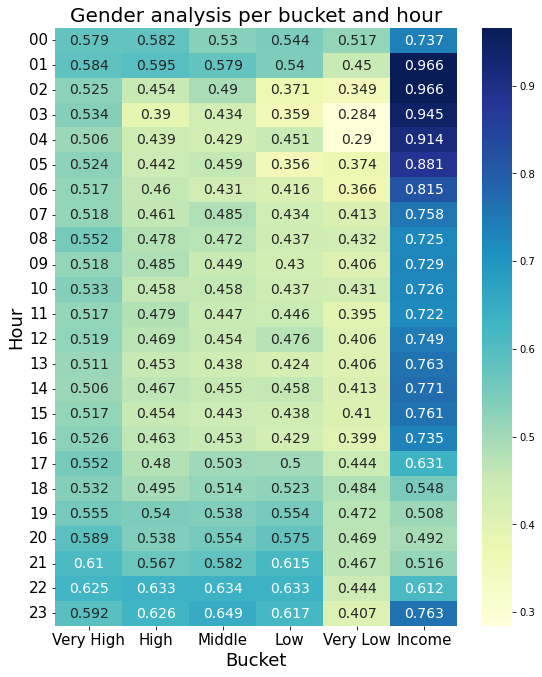

In [50]:
#tabl4
plot_pivot_table(tabl4)

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    + 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    + 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    + 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [51]:
# Type your code here
convert = {'tr_day': int}
tr_day = df.tr_datetime.str.split(expand=True)[0]
df['tr_day'] = tr_day
df = df.astype(convert)

In [52]:
mcc6 = transactions['mcc_code'].value_counts()
mcc6 = mcc6[mcc6 > 60000]
mcc6

6011    199281
6010    199266
5411    144202
4814    120694
4829     77936
Name: mcc_code, dtype: int64

<Axes: xlabel='tr_day'>

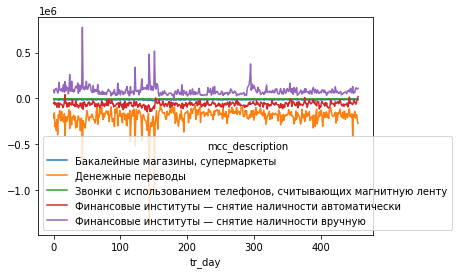

In [53]:
tabl5 = df.loc[df.mcc_code.isin(mcc6.index)].groupby(['tr_day','mcc_description']).amount.mean()
postr = tabl5.unstack(level=-1)
postr.plot()